# **CS 620 PROJECT** 

# COVID-19 Analysis in U.S. Counties Broken Down by Demographics

**Name**: Dheeraj Reddy Patlolla

**Email**: dpatl001@odu.edu

**Portifolio**: https://www.cs.odu.edu/~dpatloll/

# Data Sources




### **Name** : Election, COVID, and Demographic Data by County (November 14th, 2020)

### **URL** : https://www.kaggle.com/etsc9287/2020-general-election-polls

### **Description**: This data compiles county statistics for the 2016 and 2020 presidential elections, COVID cases and deaths, demographic numbers, and economic numbers.


### **Name** : COVID-19 US County JHU Data & Demographics
(Johns Hopkins reported cases & deaths together with survey demographic features November 28th, 2020)

### **URL** : https://www.kaggle.com/headsortails/covid19-us-county-jhu-data-demographics

### **Description**: This dataset contains daily updated number of reported cases & deaths, matching demographic information in the US on the state and county level, as provided by the Johns Hopkins University.



### **Name** : The COVID Racial Data Tracker (November 29th, 2020)

### **URL** : https://covidtracking.com/race

### **Description**: The COVID Racial Data Tracker advocates for, collects, publishes, and analyzes racial data on the pandemic across the United States.



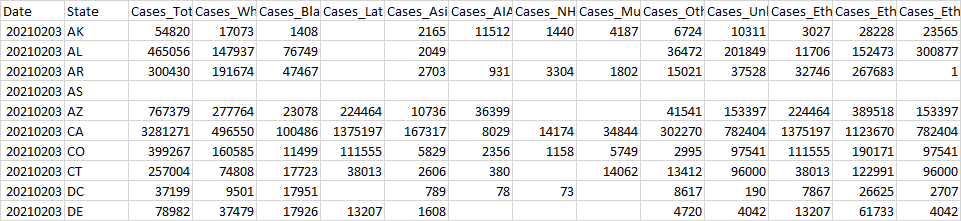

# Project Plan


1. Removing more unnecesary data in all the datasets.

1. Reanalyze and find if there are any missing data regarding COVID-19.

1. Find another dataset which has updated.

1. Make a dataframe that contains only the required columns.

1. Before creating visualizations split all the data into its perspective ranges, separate demographic rates into six different ranges to better distingush the data and, find a relationship between demographic to mortality rate and the number of cases.

2. Creating a plot that shows the relationship between the number of cases and different demographics, see if there is a correlation between the data.










# Data Science Process

1. Problem defining

2. Data Collection

3. Data Processing

4. Data Visualizing

5. Data Analyzing

6. Report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Define the problem:**

There has been speculations regarding COVID-19 disproportionatly affecting people of different demographics such as minority populations or people of lower income in the United States.

Description of topic:

I am going to analyze a dataset that groups each county in the United States and breaks each county's demographics down. I am going to use this data to find out the extent of which COVID-19 is affecting minority and lower income area populations to find correlations.

**Rationale**

COVID-19 is here for the long haul and its important this country takes the neccesary measures to provide equal and just healthcare for all in need regardless of race, gender, employment, and any other discriminatory factors. This is especially important because COVID-19 can effect people of different minorities differently. COVID-19 can also uniquely affect areas with different economic statuses due to different factors. After hearing many stories about this on the news, and other sources, decided to look deeper into the data for this and learn more about the unequal effects the disease has on different demographics.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import matplotlib.gridspec as gridspec

### **Step-1:**


Data:

The first data source being used is from https://www.kaggle.com/etsc9287/2020-general-election-polls which is updated as of November 14th, 2020. This data source is in the form of a CSV file.

Process:

Firstly, will clean this dataset. The 2020 election-related data columns will be removed as it is irrelevant. The data was also cleaned and replaced with all the empty cells with NaN. The NaN does not show in the CSV due to auto reformatting. The data lastly was also sorted by state so all the counties from one state could be seen clearly.

In [ ]:
#change all the empty values to NaN in first dataset
county_demos = pd.read_csv('/content/drive/MyDrive/county_statistics.csv',na_values=' ') 

#remove all the election related data and any other data that is not being used
county_demos = county_demos.drop(["Unnamed: 0","percentage16_Donald_Trump","percentage16_Hillary_Clinton","total_votes16","votes16_Donald_Trump","votes16_Hillary_Clinton","percentage20_Donald_Trump","percentage20_Joe_Biden","total_votes20","votes20_Donald_Trump","votes20_Joe_Biden", "lat", "long", "cases", "deaths","Employed","PrivateWork","PublicWork","SelfEmployed","FamilyWork","Transit","Walk","OtherTransp","WorkAtHome","MeanCommute","Office","Construction","Production","Drive","Carpool","VotingAgeCitizen","IncomeErr","IncomePerCapErr","Professional","Service"], axis=1)

#sort the data by state so all the counties from one state are together
county_demos = county_demos.sort_values(by=['state'])

#remove any states without complete data
county_demos = county_demos[~county_demos['county'].astype(str).str.startswith('ED')]
county_demos = county_demos[county_demos['TotalPop'].notna()]
print(county_demos)

                          county state  ...  ChildPoverty  Unemployment
4837      Aleutians East Borough    AK  ...          20.0           2.4
4838  Aleutians West Census Area    AK  ...           9.9           1.9
4839      Anchorage Municipality    AK  ...          11.5           5.8
4840          Bethel Census Area    AK  ...          33.2          19.3
4841         Bristol Bay Borough    AK  ...          11.6           6.8
...                          ...   ...  ...           ...           ...
1436                     Johnson    WY  ...          11.6           4.3
372                     Campbell    WY  ...          12.6           4.6
2997                      Weston    WY  ...          24.1           2.2
2576                    Sheridan    WY  ...           6.2           3.1
2685                    Sublette    WY  ...           5.9           4.2

[3142 rows x 16 columns]


### **Step-2:**

Data:

The initial dataset had missing data for cases and deaths for several counties so we also will use another source of data found at https://www.kaggle.com/headsortails/covid19-us-county-jhu-data-demographics and is updated daily through the pandemic. We will be using the November 28th, 2020 verison for this analysis. This is also in the form of a CSV. We will be using the first dataset for information about each county's demographics and the second dataset for data regarding the COVID-19 cases and deaths for each county. We will be merging both datasets on the basis of county below in order to get both updated and meaningful data.




Process:


First we will clean the second dataset which contains information about the updated case and death count for each county by getting the intersection of the counties. Next we will merge this dataframe with the county demographics data frame. We will create a mortality rate column for further reference analysis.

In [ ]:
# read second dataset from csv
current_cases = pd.read_csv('/content/drive/MyDrive/covid_us_county.csv', na_values=' ')

# remove repeated columns or unnecessary columns
current_cases = current_cases.drop(["fips", "lat", "long", "state"], axis=1)

# sort values by state so all counties from one state are together
current_cases = current_cases.sort_values(by=['state_code'])

# only keep the most updated information as of November 28th, 2020
current_cases = current_cases[current_cases.date == '2020-11-28']
current_cases = current_cases.rename(columns={"state_code": "state"})

current_cases['county'] = current_cases['county'].str.lower().str.strip()
cuurent_cases = current_cases.drop(['date'],axis=1)
county_demos['county'] = county_demos['county'].str.lower().str.strip()

# merge cases_sum table to other county data set
county_int = pd.merge(county_demos, current_cases, how ='inner', on =['state', 'county']) 

# calculate mortality rate
county_int['MortalityRate'] = (county_int['deaths']/county_int['cases']) * 100
county_int = county_int.round(decimals=1)
county_int.to_csv('merged_dataset.csv') 
county_int

,county,state,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Poverty,ChildPoverty,Unemployment,date,cases,deaths,MortalityRate
0,lowndes,AL,10362.0,4896.0,5466.0,0.7,24.3,74.4,0.1,0.0,0.0,29785.0,18976.0,30.2,48.4,11.2,2020-11-28,799,29,3.6
1,marengo,AL,19743.0,9235.0,10508.0,0.4,45.1,54.1,0.1,0.0,0.0,32255.0,22996.0,25.6,36.5,12.8,2020-11-28,1215,24,2.0
2,limestone,AL,91695.0,45889.0,45806.0,5.8,77.2,13.1,0.7,1.2,0.0,52831.0,26685.0,14.8,20.0,7.1,2020-11-28,4251,45,1.1
3,madison,AL,353213.0,172568.0,180645.0,4.7,65.1,24.0,0.6,2.5,0.1,61318.0,34232.0,13.6,20.0,6.5,2020-11-28,13223,148,1.1
4,lee,AL,156597.0,77172.0,79425.0,3.7,67.6,22.9,0.1,3.8,0.0,47564.0,26170.0,22.0,24.0,5.7,2020-11-28,7757,66,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,johnson,WY,8562.0,4548.0,4014.0,2.1,91.7,1.4,2.7,0.0,0.0,52415.0,32732.0,9.9,11.6,4.3,2020-11-28,313,4,1.3
3073,campbell,WY,48116.0,25001.0,23115.0,8.4,87.7,0.3,0.8,0.5,0.0,80178.0,33200.0,9.4,12.6,4.6,2020-11-28,2950,12,0.4
3074,weston,WY,7117.0,3756.0,3361.0,1.4,91.6,0.5,0.1,4.3,0.0,59605.0,30955.0,14.4,24.1,2.2,2020-11-28,396,1,0.3
3075,sheridan,WY,29964.0,14816.0,15148.0,4.2,91.6,0.9,1.0,0.7,0.0,56455.0,31643.0,6.8,6.2,3.1,2020-11-28,1896,10,0.5


Now, we calculate the mortality rate by finding the percent ratio of number of deaths to number of cases. 

In [ ]:
# calculate mortality rate
county_int['MortalityRate'] = (county_int['deaths']/county_int['cases']) * 100
county_int = county_int.round(decimals=1)
 
county_int

,county,state,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Poverty,ChildPoverty,Unemployment,date,cases,deaths,MortalityRate
0,lowndes,AL,10362.0,4896.0,5466.0,0.7,24.3,74.4,0.1,0.0,0.0,29785.0,18976.0,30.2,48.4,11.2,2020-11-28,799,29,3.6
1,marengo,AL,19743.0,9235.0,10508.0,0.4,45.1,54.1,0.1,0.0,0.0,32255.0,22996.0,25.6,36.5,12.8,2020-11-28,1215,24,2.0
2,limestone,AL,91695.0,45889.0,45806.0,5.8,77.2,13.1,0.7,1.2,0.0,52831.0,26685.0,14.8,20.0,7.1,2020-11-28,4251,45,1.1
3,madison,AL,353213.0,172568.0,180645.0,4.7,65.1,24.0,0.6,2.5,0.1,61318.0,34232.0,13.6,20.0,6.5,2020-11-28,13223,148,1.1
4,lee,AL,156597.0,77172.0,79425.0,3.7,67.6,22.9,0.1,3.8,0.0,47564.0,26170.0,22.0,24.0,5.7,2020-11-28,7757,66,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,johnson,WY,8562.0,4548.0,4014.0,2.1,91.7,1.4,2.7,0.0,0.0,52415.0,32732.0,9.9,11.6,4.3,2020-11-28,313,4,1.3
3073,campbell,WY,48116.0,25001.0,23115.0,8.4,87.7,0.3,0.8,0.5,0.0,80178.0,33200.0,9.4,12.6,4.6,2020-11-28,2950,12,0.4
3074,weston,WY,7117.0,3756.0,3361.0,1.4,91.6,0.5,0.1,4.3,0.0,59605.0,30955.0,14.4,24.1,2.2,2020-11-28,396,1,0.3
3075,sheridan,WY,29964.0,14816.0,15148.0,4.2,91.6,0.9,1.0,0.7,0.0,56455.0,31643.0,6.8,6.2,3.1,2020-11-28,1896,10,0.5


### Step 3: Income Per Capita vs COVID-19

Next we will analyze the income per capita per county to find if there is a correlation to the number of COVID-19 cases and deaths.

Process:

We will make a data frame that contains only the needed columns.

In [ ]:
#create a dataframe Income PerCaptia
incomePerCap = pd.DataFrame()

#create a column for county
incomePerCap['county'] = county_int['county']

#create a column for state
incomePerCap['state'] = county_int['state']

#create a column for incomepercaptia
incomePerCap['IncomePerCap'] = county_int['IncomePerCap']

#create a column for both cases and deaths
incomePerCap['cases'] = county_int['cases']
incomePerCap['deaths'] = county_int['deaths']

#adding the mortality rate from the previous dataset to this dataframe
incomePerCap['MortalityRate'] = county_int['MortalityRate']

incomePerCap

,county,state,IncomePerCap,cases,deaths,MortalityRate
0,lowndes,AL,18976.0,799,29,3.6
1,marengo,AL,22996.0,1215,24,2.0
2,limestone,AL,26685.0,4251,45,1.1
3,madison,AL,34232.0,13223,148,1.1
4,lee,AL,26170.0,7757,66,0.9
...,...,...,...,...,...,...
3072,johnson,WY,32732.0,313,4,1.3
3073,campbell,WY,33200.0,2950,12,0.4
3074,weston,WY,30955.0,396,1,0.3
3075,sheridan,WY,31643.0,1896,10,0.5


Before we create visualizations for the income per capital data, we need to split all the data into its perspective ranges. We will separate the income per capitas into six different ranges to better distingush the data and find a relationship between income per capita to mortality rate and the number of cases.

In [ ]:
#sorting the values in the dataframe
incomePerCap = incomePerCap.sort_values(by = "IncomePerCap")

#finding minima and maxima values from income percaptia dataframe
min_incomecap = incomePerCap["IncomePerCap"].min() 
max_incomecap = incomePerCap["IncomePerCap"].max() 

#setting up the certain range
range_incomecap = (max_incomecap - min_incomecap)/8 


#creating a column for income percaptia range
#append the valuea based on their ranges
rangeI = []
for i in incomePerCap["IncomePerCap"]:
    if i < (range_incomecap + min_incomecap):
        rangeI.append("9334-18955.17")
    elif i < (range_incomecap*2 + min_incomecap):
        rangeI.append("18955.17-28576.34")
    elif i < (range_incomecap*3 + min_incomecap):
        rangeI.append("28576.34-38197.50")
    elif i < (range_incomecap*4 + min_incomecap):
        rangeI.append("38197.50-47818.67")
    elif i < (range_incomecap*5 + min_incomecap):
        rangeI.append("47818.67-57439.84")
    else:
        rangeI.append("57439.836-67061.00")

#column name is named as Income Per Captia Range
incomePerCap["Income Per Capita Range"] = rangeI      
incomePerCap

,county,state,IncomePerCap,cases,deaths,MortalityRate,Income Per Capita Range
2350,oglala lakota,SD,9334.0,1619,23,1.4,9334-18955.17
2336,buffalo,SD,10960.0,376,8,2.1,9334-18955.17
477,wheeler,GA,11192.0,423,19,4.5,9334-18955.17
996,mccreary,KY,11492.0,400,1,0.2,9334-18955.17
2355,todd,SD,11665.0,941,12,1.3,9334-18955.17
...,...,...,...,...,...,...,...
159,san francisco,CA,59508.0,15377,160,1.0,57439.836-67061.00
263,pitkin,CO,65800.0,477,2,0.4,57439.836-67061.00
197,marin,CA,66748.0,7755,129,1.7,57439.836-67061.00
2788,arlington,VA,67061.0,6203,157,2.5,57439.836-67061.00


Process:

To visualize this data, we are using the seaborn violin plot which is essentially a combination of a box plot and a kernel density plot. In a violin plot, we can find the median, interquartile range, and upper/lower outliers. Violin plot is useful here because it provides a meaningful way to spot trends between the multiple ranges we've defined with regards to the median, how the median may be affected by the outliers, and analyze the distribution of data. We will not consider extreme outliers in this distribution for our analysis.

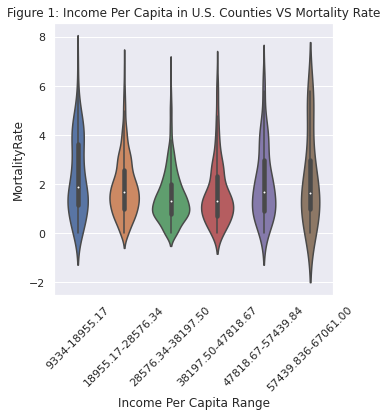

In [ ]:
#set the size of the figure to vew visualization
sns.set(rc={'figure.figsize':(5,5)})

#shows the plot with mortality values for less than 7 only
incomePerCap = incomePerCap.loc[incomePerCap.MortalityRate < 7]
plt.xticks(rotation=45)

#setting up the axis values for the violin plot
income_plt = sns.violinplot(x="Income Per Capita Range",y ="MortalityRate",data = incomePerCap).set_title('Figure 1: Income Per Capita in U.S. Counties VS Mortality Rate')

Looking at the chart above, we can see that the medians are all similar with only a slight variation while the distribution of data varies slightly. The median does not vary in any pattern. The highest distribution of data is found within income per captias of around 28,500-38,000.

Process:

To visualize the income per capita against the number of cases, we will use a scatter plot. Scatter plot will help deteremine if there is a correlation between income per capita and the number of cases.



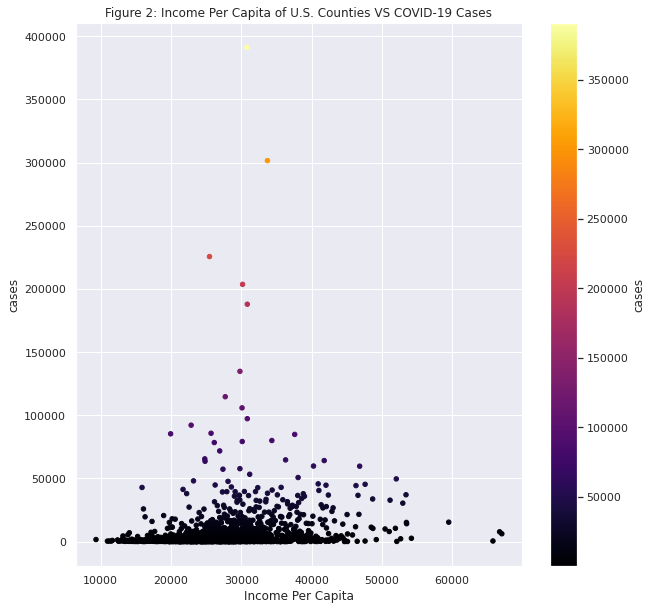

In [ ]:
#obtaining a scatter plot
plot = incomePerCap.plot.scatter('IncomePerCap','cases', c = 'cases' ,cmap = "inferno", figsize=(10,10), title='Figure 2: Income Per Capita of U.S. Counties VS COVID-19 Cases',legend=True, sharex=False)
plot = plot.set_xlabel('Income Per Capita')

# calculate correlation coefficient between income per capita and COVID-19 cases
income_corr = incomePerCap['IncomePerCap'].corr(incomePerCap['cases'])

The highest number of cases occur when the income per capita is approx 31,000 and the number of cases is close to 40,000. The peak number of cases occur near an income per capita of 30,000 more or less however there is no clear relationship shown between income per capita and the number of cases.

### Step-4: Poverty vs. COVID-19

Next we will analyze the poverty rate per county to find if there is a correlation to the number of COVID-19 cases and deaths.

Process:

We will make a data frame that contains only the needed columns.


In [ ]:
#creating a dataframe
pov_table = pd.DataFrame()

#create a column for county 
pov_table["county"] = county_int["county"]

#create a column for state 
pov_table["state"] = county_int["state"]

#create a column for poverty
pov_table["Poverty"] = county_int["Poverty"]

#adding the mortality rate and number of cases from the previous dataset to this dataframe
pov_table["Mortality Rate"] = county_int["MortalityRate"]
pov_table["Cases"] = county_int["cases"]
pov_table

,county,state,Poverty,Mortality Rate,Cases
0,lowndes,AL,30.2,3.6,799
1,marengo,AL,25.6,2.0,1215
2,limestone,AL,14.8,1.1,4251
3,madison,AL,13.6,1.1,13223
4,lee,AL,22.0,0.9,7757
...,...,...,...,...,...
3072,johnson,WY,9.9,1.3,313
3073,campbell,WY,9.4,0.4,2950
3074,weston,WY,14.4,0.3,396
3075,sheridan,WY,6.8,0.5,1896


Next, we will take a look and see if there is a correlation between the poverty rate and the number of cases/deaths. Before we create visualizations for the poverty data, we will split all the data into its perspective ranges. We will also separate the poverty rates into six different ranges to better distingush the data and find a relationship between poverty rate to mortality rate and the number of cases.

In [ ]:
#sorting the values in the dataframe
pov_table = pov_table.sort_values(by = "Poverty")


#finding minima and maxima values 
minVal = pov_table["Poverty"].min()
maxVal = pov_table["Poverty"].max()

#setting up the certain range
range_amt = (maxVal - minVal)/6

#creating a column for income percaptia range
#append the values based on their ranges
rangeP = []

for i in pov_table["Poverty"]:
    if i < (range_amt + minVal):
        rangeP.append("2.4-10.63")
    elif i < (range_amt*2 + minVal):
        rangeP.append("10.63-18.86")
    elif i < (range_amt*3 + minVal):
        rangeP.append("18.86-27.09")
    elif i < (range_amt*4 + minVal):
        rangeP.append("27.09-35.33")
    elif i < (range_amt*5 + minVal):
        rangeP.append("35.33-43.56")
    else:
        rangeP.append("43.56-52.0")
    
#naming the column and dropping out the null values    
pov_table["Poverty Rate"] = rangeP 
pov_table.dropna()
pov_table

,county,state,Poverty,Mortality Rate,Cases,Poverty Rate
2762,morgan,UT,2.4,NaN,0,2.4-10.63
1794,wheeler,NE,2.6,0.0,13,2.4-10.63
2741,borden,TX,2.8,0.0,8,2.4-10.63
2331,lincoln,SD,3.0,1.0,5353,2.4-10.63
1775,oliver,ND,3.1,1.6,123,2.4-10.63
...,...,...,...,...,...,...
1519,jefferson,MS,47.0,3.1,352,43.56-52.0
2390,corson,SD,47.9,1.3,377,43.56-52.0
1092,east carroll,LA,48.2,1.2,741,43.56-52.0
2350,oglala lakota,SD,51.9,1.4,1619,43.56-52.0


Process:

Once these ranges, have been marked, we will need to create the violin chart. We will not consider extreme outliers in this distribution for our analysis.

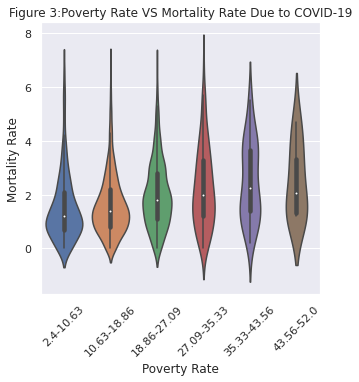

In [ ]:
#create a visualization for mortality less than 7
pov_table = pov_table.loc[pov_table['Mortality Rate'] < 7]
plt.xticks(rotation=45)

#naming the axis values for the violin plot
ax = sns.violinplot(x="Poverty Rate",y ="Mortality Rate",data=pov_table).set_title('Figure 3:Poverty Rate VS Mortality Rate Due to COVID-19')

Looking at the chart above, we can see that there is a trend in the mortality rate and the poverty range. We can see that the median for each range is consistently increasing and the density grows smaller. Overall, this graph shows that as the povery rate increases, the mortality rate for covid cases increases.

Process:

Next, we will be creating a plot that shows the relationship between the number of cases and the poverty rate. This is going to be a scatter plot because we want to get a better idea of how the cases vary based on the different poverty values. We want to also look at all the data from the different counties because different counties because their povery rates vary.

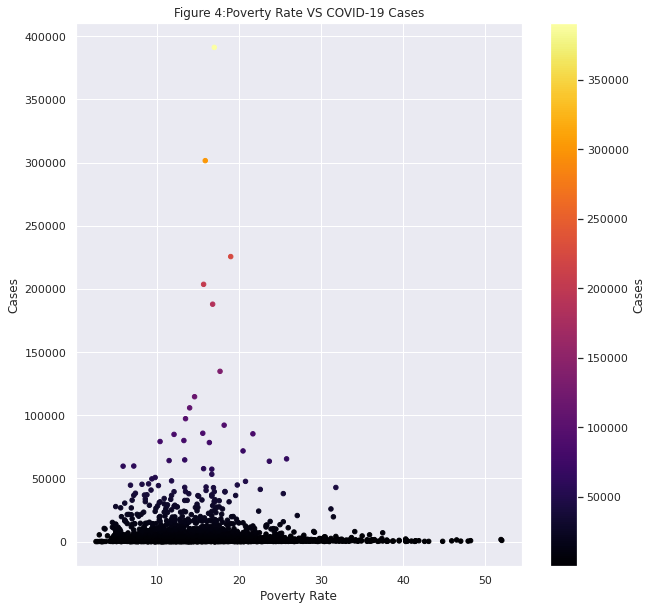

In [ ]:
#sorting by number of cases
pov_table = pov_table.sort_values(by = "Cases")

# calculate correlation coefficient between poverty rate and COVID-19 cases
pov_corr = pov_table['Poverty'].corr(pov_table['Cases'])

#obtaining a scatter plot name the axis
plot = pov_table.plot.scatter(x="Poverty",y='Cases',c="Cases",cmap='inferno',figsize=(10,10),sharex=False, title='Figure 4:Poverty Rate VS COVID-19 Cases')
plot = plot.set_xlabel('Poverty Rate')

The highest number of cases occur when the poverty rate is approx 16-17% and the number of cases is close to 40,000. The highest number of cases occur when the poverty rate is between 15-20%. We can see that that as the poverty rate increases after 20% the overall amount of cases per poverty rate decrease. Overall however there is no clear relationship shown between the poverty rate and the number of cases.


### Step 5: Unemployment vs. COVID-19

Next we will analyze the unemployment rate per county to find if there is a correlation to the number of COVID-19 cases and deaths.

Process:

We will make a data frame that contains only the needed columns.


In [ ]:
#creating a dataframe
unemploy = pd.DataFrame(columns=['County','Unemployment Rate','Mortality Rate','Cases', 'Deaths'],)

#create a county column
unemploy['County'] = county_int['county']

#create a column for unemployment rate
unemploy['Unemployment Rate'] = county_int['Unemployment']

#create a column for mortality rate
unemploy['Mortality Rate'] = county_int['MortalityRate']

#create a column for cases and deaths seperatly
unemploy['Cases'] = county_int['cases']
unemploy['Deaths'] = county_int['deaths']

#sorting the values by unemployment rates
unemploy = unemploy.sort_values(by = "Unemployment Rate")
unemploy

,County,Unemployment Rate,Mortality Rate,Cases,Deaths
1904,catron,0.0,2.9,35,1
1948,eureka,0.0,0.0,24,0
3062,niobrara,0.0,0.0,117,0
2611,kenedy,0.0,12.5,16,2
1867,mcpherson,0.0,0.0,15,0
...,...,...,...,...,...
1554,quitman,24.3,1.4,492,7
2394,dewey,25.9,0.4,822,3
2708,mcmullen,26.3,3.2,31,1
2375,ziebach,27.0,4.1,172,7


Process: 

Before we create visualizations for the unemployment rate data, we need to split all the data into its perspective ranges. We will separate the unemployment rates into six different ranges to better distingush the data and find a relationship between unemployment rate to mortality rate and the number of cases.

In [ ]:
#breaking down the data into different ranges
range_list=[]

#get the minima and maxima values respectively
minVal = unemploy['Unemployment Rate'].min() 
maxVal = unemploy['Unemployment Rate'].max() 

#calculate range and append the values into th e table based on their range
range_amt = (maxVal - minVal)/6 
range_u = []

for i in unemploy['Unemployment Rate']:
    if i < (range_amt + minVal):
        range_u.append("0-4.783")
    elif i < (range_amt*2 + minVal):
        range_u.append("4.783-9.56")
    elif i < (range_amt*3 + minVal):
        range_u.append("9.56-14.34")
    elif i < (range_amt*4 + minVal):
        range_u.append("14.34-19.12")
    elif i < (range_amt*5 + minVal):
        range_u.append("19.12-23.90")
    else:
        range_u.append("23.90-28.68")

#naming the column data
unemploy["Unemployment Range"] = range_u
unemploy

,County,Unemployment Rate,Mortality Rate,Cases,Deaths,Unemployment Range
1904,catron,0.0,2.9,35,1,0-4.783
1948,eureka,0.0,0.0,24,0,0-4.783
3062,niobrara,0.0,0.0,117,0,0-4.783
2611,kenedy,0.0,12.5,16,2,0-4.783
1867,mcpherson,0.0,0.0,15,0,0-4.783
...,...,...,...,...,...,...
1554,quitman,24.3,1.4,492,7,23.90-28.68
2394,dewey,25.9,0.4,822,3,23.90-28.68
2708,mcmullen,26.3,3.2,31,1,23.90-28.68
2375,ziebach,27.0,4.1,172,7,23.90-28.68


Process:

Once these ranges, have been marked, we will need to create the violin chart. We will not consider extreme outliers in this distribution for our analysis. Looking at the chart, the median increases steadily to mid-range unemployment rate with a peak at the unployment range of 14-19% then decreases again.


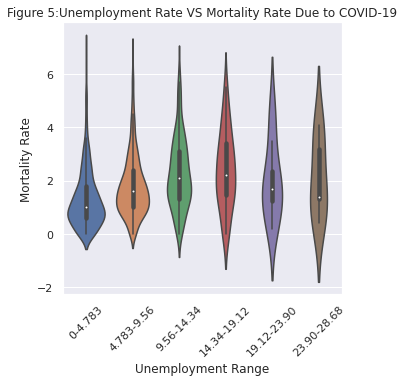

In [ ]:
#create a visualization for mortality rate less than 7
unemploy = unemploy.loc[unemploy['Mortality Rate'] < 7]

#give the axis values 
ax = sns.violinplot(x="Unemployment Range",y ="Mortality Rate",data=unemploy).set_title('Figure 5:Unemployment Rate VS Mortality Rate Due to COVID-19')
plt.xticks(rotation=45)

#set the size of the plot
sns.set(rc={'figure.figsize':(5,5)})

Looking at the chart, the median increases steadily to a mid-range unemployment rate with a peak at the unployment range of 14-19% then decreases again.The overall distribution of the violins are larger when the unemployment rate is low and then the distribution spreads out more as the unemployment range increases.


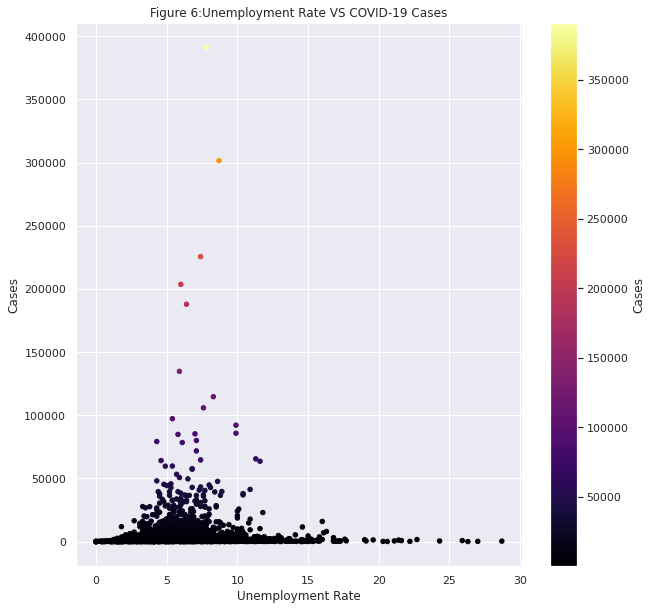

In [ ]:
#calculate correlation coefficient between unemployment rate and COVID-19 cases
correlation = unemploy['Unemployment Rate'].corr(unemploy['Mortality Rate'])
correlation

#create a scatter plot
unemploy.plot.scatter('Unemployment Rate','Cases', c = 'Cases' ,cmap = "inferno", figsize=(10,10), legend=True, sharex=False, title='Figure 6:Unemployment Rate VS COVID-19 Cases')

The highest number of cases occur when the unemployment rate is approx 7-8% and the number of cases is close to 40,000. Overall,the highest number of cases occur when the poverty rate is between 5-10%. We can see that as the unemployment rate increases after 10% the overall amount of cases per unemployment rate decreases. Overall however there is no clear relationship shown between the unemployment rate and the number of cases.


### Step 6: Race vs COVID-19
Data:

Now that we've analyzed some of the economic factors that could be correlated to COVID-19 cases and deaths, we will look into the race aspect. We'll see if there is a correlation between race and COVID-19 cases and deaths. Our current dataset does not have usable data about the different races because it only contains the percentage of each race in the population of the county, however we need information about the Covid-19 cases based on races. Fortunately, we were able to find a dataset that contained the information needed to analyze a correlation between race and Covid-19 cases and deaths so we will be merging that dataset into our existing set and analyzing it. The source of our race data is https://covidtracking.com/race which is updated as of November 29th, 2020.


Process:

First we will clean the data and create a dataframe with needed columns. We will use data for all 50 states in addition to Washington D.C. We will not be including U.S. terrioties for this analysis.


In [ ]:
#read the data from the third datset and drop null values
race_list = pd.read_csv('/content/drive/MyDrive/CRDT Data - CRDT.csv',na_values=' ')
#race_list = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQYKRxEJWGx1Md09WFnfbk0w9uMUo-cwiRWse4sEntCG4cKkbEWp5gcNLq7LHXpqtEwpzIDk3WKbWmB/pub?output=csv',na_values=' ')

#sorting the state column values and filtering by the date
race_list = race_list.sort_values(by=['State'])
race_list = race_list[race_list.Date == 20201129]

#dropping the irrelevant column values
race_list = race_list.drop(['Hosp_Total', 'Cases_Other','Hosp_White','Hosp_Black','Hosp_Latinx','Hosp_Asian','Hosp_AIAN','Hosp_NHPI','Hosp_Multiracial','Hosp_Other','Hosp_Unknown','Hosp_Ethnicity_Hispanic','Hosp_Ethnicity_NonHispanic','Hosp_Ethnicity_Unknown','Deaths_Unknown', 'Deaths_Ethnicity_NonHispanic','Cases_Ethnicity_Unknown','Deaths_Ethnicity_Unknown','Cases_Multiracial','Deaths_Multiracial','Deaths_Other','Cases_Ethnicity_NonHispanic','Tests_Total','Tests_White','Tests_Black','Tests_Latinx','Tests_Asian','Tests_AIAN','Tests_NHPI','Tests_Multiracial','Tests_Other','Tests_Unknown','Tests_Ethnicity_Hispanic','Tests_Ethnicity_NonHispanic','Tests_Ethnicity_Unknown'], axis=1)

#remove U.S. territories
race_list = race_list[race_list.State != 'AS']
race_list = race_list[race_list.State != 'VI']
race_list = race_list[race_list.State != 'PR']
race_list = race_list[race_list.State != 'MP']
race_list = race_list[race_list.State != 'GU'].reset_index()
race_list['Cases_White'] = race_list['Cases_White'].replace('%','').astype(np.float64)
race_list


,index,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Unknown,Cases_Ethnicity_Hispanic,Deaths_Total,Deaths_White,Deaths_Black,Deaths_Latinx,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Ethnicity_Hispanic
0,1568,20201129,AK,32065.0,10211.0,957.0,NaN,1212.0,6733.0,1019.0,6990.0,1782.0,121.0,40.0,5.0,NaN,9.0,44.0,9.0,1.0
1,1569,20201129,AL,247229.0,74716.0,44525.0,NaN,804.0,NaN,NaN,102141.0,9103.0,3577.0,1856.0,1149.0,NaN,12.0,NaN,NaN,86.0
2,1570,20201129,AR,156247.0,96248.0,28280.0,NaN,1406.0,404.0,2656.0,17879.0,20937.0,2470.0,1726.0,405.0,NaN,20.0,7.0,48.0,111.0
3,1572,20201129,AZ,325995.0,90040.0,9362.0,94483.0,3632.0,17733.0,NaN,98054.0,94483.0,6634.0,2886.0,200.0,1951.0,76.0,705.0,NaN,1951.0
4,1573,20201129,CA,1198934.0,165513.0,35650.0,508059.0,49501.0,2607.0,4640.0,335108.0,508059.0,19189.0,5768.0,1388.0,9227.0,2223.0,64.0,93.0,9227.0
5,1574,20201129,CO,228772.0,76181.0,5810.0,70461.0,2813.0,1098.0,640.0,67327.0,70461.0,3003.0,1838.0,147.0,684.0,76.0,17.0,6.0,684.0
6,1575,20201129,CT,112581.0,35622.0,10224.0,20933.0,1349.0,159.0,NaN,39502.0,20933.0,4961.0,3622.0,718.0,455.0,54.0,2.0,NaN,455.0
7,1576,20201129,DC,21448.0,5048.0,10058.0,NaN,348.0,43.0,62.0,78.0,5103.0,680.0,68.0,505.0,90.0,9.0,NaN,NaN,90.0
8,1577,20201129,DE,35251.0,15070.0,8698.0,6920.0,583.0,NaN,NaN,2082.0,6920.0,770.0,512.0,191.0,52.0,2.0,NaN,NaN,52.0
9,1578,20201129,FL,992661.0,296152.0,130118.0,296671.0,NaN,NaN,NaN,205071.0,296671.0,18736.0,9353.0,3252.0,4649.0,NaN,NaN,NaN,4649.0


After the dataset is clean we will gather the sums for cases and death count divided by race/ethnicity.

In [ ]:
#creating a dataframe
race_detail = pd.DataFrame()

#creating the table with Races column
race_detail['Races'] = ['White', 'Black', 'Latinx', 'Asian','AIAN', 'NHPI', 'Hispanic']

#creating the Cases column
race_detail['Cases'] = [race_list['Cases_White'].sum(), race_list['Cases_Black'].sum(),
                        race_list['Cases_Latinx'].sum(),race_list['Cases_Asian'].sum(), race_list['Cases_AIAN'].sum(),
                       race_list['Cases_NHPI'].sum(), race_list['Cases_Ethnicity_Hispanic'].sum()]

#creating the column with number of deaths
race_detail['Deaths'] = [race_list['Deaths_White'].sum(), race_list['Deaths_Black'].sum(),
                        race_list['Deaths_Latinx'].sum(),race_list['Deaths_Asian'].sum(), race_list['Deaths_AIAN'].sum(),
                       race_list['Deaths_NHPI'].sum(), race_list['Deaths_Ethnicity_Hispanic'].sum()]

#create a column for mortality rate
race_detail['Mortality Rate'] = (race_detail['Deaths']/race_detail['Cases'])*100
race_detail = race_detail.rename(columns={"Races": "Race/Ethnicity"})
race_detail

,Race/Ethnicity,Cases,Deaths,Mortality Rate
0,White,4722779.0,136675.0,2.893953
1,Black,1238308.0,47242.0,3.815044
2,Latinx,1636717.0,46064.0,2.814414
3,Asian,225676.0,8696.0,3.853312
4,AIAN,114209.0,2331.0,2.040995
5,NHPI,26653.0,360.0,1.350692
6,Hispanic,2051645.0,49191.0,2.397637


Process:


Next we will plot a bar graph to visualize how different races/ethnicites were affected by COVID-19 cases. The graph shows that the white population has the largest number of cases.

Text(0.5, 0.98, '')

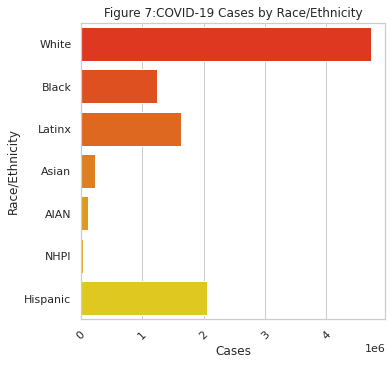

In [ ]:
#creating a whitegrid seaborn plot
sns.set(style="whitegrid")

#set the dimensions for the whole chart
plt.figure(2, figsize=(12,12))
the_grid = gridspec.GridSpec(2, 2)

#set the plot size
plt.subplot(the_grid[0, 0], title='Figure 7:COVID-19 Cases by Race/Ethnicity')

#name the type of plot and axis
sns.barplot(x='Cases',y='Race/Ethnicity', data=race_detail, palette='autumn')
plt.xticks(rotation=45)

#give the fontsize
plt.suptitle('', fontsize=16)

Looking at the graph above we can see that the number of cases for Whites is the highest and the number of cases for Hispanics is second highest. The lowest cases are for Pacific Islanders (NHPI).







Process:


We will plot a bar graph to visualize how different races/ethnicites were affected by COVID-19 deaths. We can see that the white population has had the highest death count.


Text(0.5, 0.98, '')

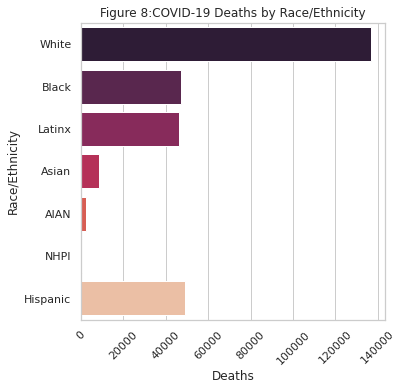

In [ ]:
##creating a whitegrid seaborn plot
sns.set(style="whitegrid")

#set the dimensions for the whole chart
plt.figure(2, figsize=(12,12))
the_grid = gridspec.GridSpec(2, 2)

#set the plot size
plt.subplot(the_grid[0, 0], title='Figure 8:COVID-19 Deaths by Race/Ethnicity')

#name the type of plot and axis
sns.barplot(x='Deaths',y='Race/Ethnicity', data=race_detail, palette='rocket')
plt.xticks(rotation=45)

#give the fontsize
plt.suptitle('', fontsize=16)

Looking at the graph above, we can see that Whites also have the highest amount of deaths. Hispanics have the second highest number of deaths but not by much. The number of deaths for Blacks, Hispanics and LatinX are very close based on this graph.The number of deaths for Pacific Islanders (NHPI) is the least.

Process:


Finally, we created a bar chart that visualizes both number of cases and deaths for each race/ethnicity.


Text(0, 0.5, 'Cases and Deaths')

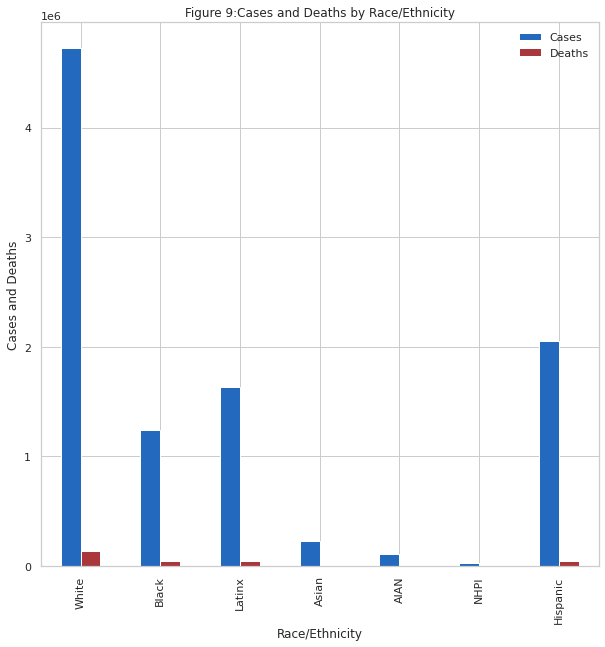

In [ ]:
#create a bar plot for cases and deaths
ax=race_detail.plot(x="Race/Ethnicity", y=["Cases", "Deaths"], kind="bar",figsize=(10,10), cmap='vlag', title='Figure 9:Cases and Deaths by Race/Ethnicity')
ax.set_ylabel("Cases and Deaths")

Looking at the graph above, we can see that the number of cases and deaths is the highest for Whites while the Hispanics are a close second. However, looking more closely, Blacks have the highest deaths in proportion for their number of cases. Pacific Islanders have the smallest amount of cases and deaths.

Process:


To further visualize the affect of COVID-19 by race/ethnicity, we've created another bar chart which depicts the mortality rate for each. This chart shows that Black and Asian populations have the highest mortality rates.

Text(0.5, 0.98, '')

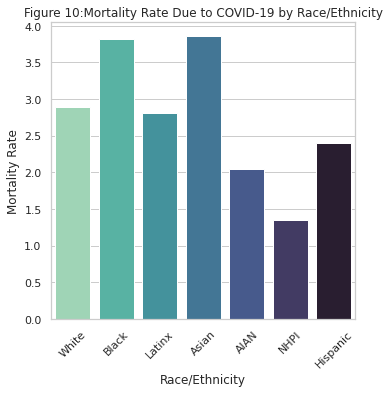

In [ ]:
#create a seaborn plot
sns.set(style="whitegrid")

#set the figure dimensions
plt.figure(2, figsize=(12,12))
the_grid = gridspec.GridSpec(2, 2)

#set the plot dimensions
plt.subplot(the_grid[0, 0], title='Figure 10:Mortality Rate Due to COVID-19 by Race/Ethnicity')

#create a bar plot
sns.barplot(x='Race/Ethnicity',y='Mortality Rate', data=race_detail, palette='mako_r')
plt.xticks(rotation=45)

#give the fontsize
plt.suptitle('', fontsize=16)

Looking at the graphs above, we can see that the Blacks and Asians have the highest mortality rate. The Whites and Latinx have a similar mortality rate. The Pacific Islanders have the lowest mortality rate.



# Analysis




After examining our data and plots regarding COVID-19 impacts on particular demographics in the U.S. there were some interesting conclusions found. Firstly, we will discuss how different economic statuses are being affected by COVID-19. Specifically we will first discuss the correlation between income per capita and COVID-19.

Taking a look at Figure 1, which depicts income per capita ranges across the U.S. counties VS the mortality rate, there is not a clear correlation found. The violin graph measures the median to be around the same across the ranges. However, the highest distribution of mortality rates is found around  28,500− 38,200 and the lowest is found in the  57,500− 67,100, which is the highest income per capita group. There could be multiple reasons why the highest income per capita group had the smallest distribution of mortality rates amongst all the income per capita groups, however, the median only varies from a mortality rate of 1.2-2% among the groups. Overall the medians for the mortality rate seem to be shifting inconsistently and don't show a clear correlation between the income per capita and mortality rate.

Again, taking a look at the scatter plot for the data in Figure 2, where the income per capitas for the counties are not grouped into ranges.The correlation found was 0.198, meaning there is not a strong correlation between income per capita and the number of cases.

Next, we will take a look at Figure 3 which visualizes poverty rates across the U.S. counties VS mortality rate. Figure 3 shows how the median across the poverty rate ranges steadily increases until before the highest poverty rates range. The highest distribution of mortality rate was seen at 2.4-10.6, and the lowest distribution was found in the range 35.3-43.6. The distribution was higher for lower poverty ranges. This shows that lower poverty ranges had more similar values for the mortality rate while the higher poverty ranges had more variation. Overall, just looking at the graph it looks like there is a small correlation between mortality rates and poverty rates because the median seems to consistently increase as the poverty range increases. This is however a very small increase.

Figure 4 is a scatter plot to visualize poverty rate VS the number of COVID-19 cases which doesn’t show a clear correlation. There is correlation of 0.19, showing that there is indeed a very small correlation found between people in higher poverty areas facing the adversities of the pandemic at a higher rate.

Furthermore, we will take a look at Figure 5 next, which visualizes unemployment rates across the U.S. counties VS mortality rate. The median steadily increases until the midrange unemployment rates, then steadily decreases. Figure 5 also shows that as unemployment increases, the distribution of mortality rates decreases. The highest distribution was found in 0-4.8 range, and the lowest distribution was in the range 23.9-26.7. Although we see an increase and then decrease in the median of the mortality rate, there is no clear correlation between the mortality rate and unemployment rate.

Looking at Figure 6, the scatter plot shows that there is not a strong correlation found between unemployment rate and the number of cases. The unemployment rate vs mortality rate has a correlation of 0.226, showing that the unemployment rate does have a small impact in regards to COVID-19 mortality rate.

Lastly, we will discuss the most widely discussed and seemingly controversial demographic when it comes to COVID-19 which is race and ethnicity. Firstly, Figure 7 shows the breakdown of the number of cases for each race or ethnicity, with the white population having the highest number of cases while the NHPI population has the least. White population has the highest number of cases as they make up the largest percentage of the total U.S. population. Next, Figure 8 is the breakdown of the number of deaths for each race or ethnicity. This plot follows a similar trend to Figure 7, where the White population has the highest number of deaths while the NHPI has the lowest number of deaths. However, this does not go to say that the white population is affected at the same rate as the other populations. Figure 9 shows a side by side comparison of the number of cases and deaths per race and ethnicity, which can be analyzed further to find disproportionate rates. Looking at Figure 10, we can see that the Asian and Black population have the highest mortality rates. Asians are dying at a rate of 3.85%, Blacks are dying at rate of 3.81%, followed by Whites at 2.89%. This shows that just because the number of cases are higher for a race it doesn’t mean they are being affected by COVID-19 more. So even though the White population has the most number of cases, they differ significantly in mortality rate from Asians and Blacks by almost 1% thus showing Asians and Blacks are being affected by COVID-19 more than the Whites.


# Revisions

We had to remove more unnecesary data in all datasets. We had to reanalyze the the first dataset and found that some counties had missing data regarding COVID-19. Thereby, we had to find another dataset which had more updated cases/death counts. The new dataset has no missing data for any of the U.S. counties. The new dataset we found is updated daily with the new case/eath count so we were able to get more up-to-date data as well. Lastly, we had to add a third dataset because our the other two datasets did not provide any infomration regarding the number of cases/deaths by race/ethnicity but only the percentages of the minority populations in each county. Only knowing the the percentage of the population by race/ethnicity per county was not enough data for us to correlate to the number of cases and deaths for those populations.


# Conclusion

COVID-19 has been an ongoing battle in this country, with cases continuing to rise almost every day since the start of the pandemic. From an economical standpoint we found that, overall, income per capita, poverty rate, and unemployment rate do not have a significant correlation to impact by COVID-19. We found that the pandemic has affected all kinds of socio-financial statuses in similar ways in regards to both cases and deaths. Looking at the pandemic’s impact on racial and ethnic minority groups, there are some clear inequities. The Asian and Black populations are disproportionately being affected by the hardships of the pandemic, putting them at an increased risk of getting sick and dying from COVID-19. This could potentially be due to many underlying reasons, such as the long-standing systemic health and social inequalities in the U.S. The U.S. must strive to build health equity so that everyone has a fair opportunity to be safe and healthy.

# Presentation

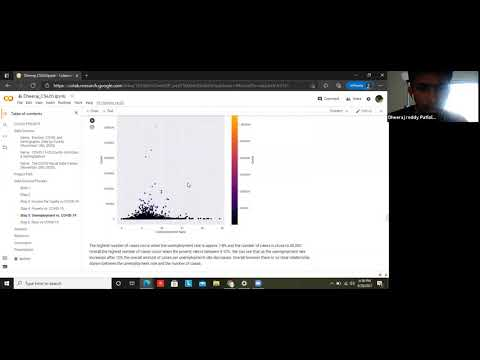

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Gfzh_wpepqI')